In [1]:
'''A function to be use later to help the gif run the graph without mixing next graphs'''
def nmes(i,n):
    if i<=n+1:
        if (i<100) or (2<len(str(i))<5):
            t=int(str(i)[0:2])
            if 0<(i or t)<10:
                prf="a"
            elif 9<(i or t)<20:
                prf='b'
            elif 19<(i or t)<30:
                prf='c'
            elif 29<(i or t)<40:    
                prf='d'
            elif 39<(i or t)<50:    
                prf='e'
            elif 49<(i or t)<60:    
                prf='f'
            elif 59<(i or t)<70:    
                prf='g'
            elif 69<(i or t)<80:    
                prf='h'
            elif 79<(i or t)<90:    
                prf='k'
            elif 89<(i or t)<100:
                prf='l'      
            if len(str(i)) ==(3 or 4):
                prf='m'+ str(t)
    return prf

In [2]:
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEID Ebola Model on the Network
image_dir="/Users/Isaacs/Desktop/Maths Wroclaw/Complex Networks/Labs/diffusion-process-of-complex-networks/Project/Images/"
def seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQD EBOLA Model on a Network: Time =" + str(i))
        
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig(image_dir+'seiqdimage/RG/SEIQD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
       # plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seiqdimagerg/SEIQD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to quarantine
        quaranp=round(delta*len(infectnode))
        new_quaran=np.random.choice(infectnode,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)         
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in infection_list:
                        if node not in infection_list2:
                            infection_list2.append(node)
        # Putting nodes from quarantine into death_list at rate epsilon
        qdeathp=round(epsilon*len(quaranode))
        if len(quaranode)!=0:
            new_death2=np.random.choice(quaranode,qdeathp)
            for node in new_death2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in death_list2:
                                death_list2.append(node)
        # New deathnode is death_list with death_list2 with initial deaths
        deatlist=death_list+death_list2
        for node in deatlist:
            if node not in deathnode:
                deathnode.append(node)
        # New quarantine is nodes from the old quarantine which are not in death_list2
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in quaran_list:
                            quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in quaranode:
                    if node not in infectnode:
                        infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in infectnode:
                if node not in exposed_list:
                    if node not in deathnode:
                        if node not in quaranode:
                            exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in susceptible_list:
                                susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,doutput])

In [22]:
# Simulation for the Random Graph
import imageio 
import os
'''G = nx.erdos_renyi_graph(100,0.2)
time, n, theta, gamma, delta, epsilon = 150,100,0.1,0.3,0.16,0.5
infection_start_node = 0
RGV=seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node)
RGV'''
png_dir= image_dir + 'seiqdimage/RG'
#png_dir = '/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seiqdimagerg/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(image_dir + "seiqdimage/SEIQD_on_RG_network.movie"+str(n)+".movie.gif", images,duration=0.8)


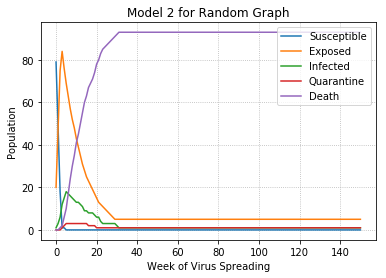

In [4]:
'''Random Graph - Visualizing EBOLA: Isolation-Control Stage'''
import matplotlib.pyplot as plt
s,e,i,q,d = RGV[0,:], RGV[1,:], RGV[2,:], RGV[3,:], RGV[4,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 2 for Random Graph')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig(image_dir+'seiqdimage/SEIQD EBOLA (Random Graph) - Data Parameter.png')
plt.show()

In [8]:
'''Watts Strogatz Code'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEIQD Ebola Model on the Network
def seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQD EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig(image_dir+'seiqdimage/WS/SEIQD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to quarantine
        quaranp=round(delta*len(infectnode))
        new_quaran=np.random.choice(infectnode,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)         
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in infection_list:
                        if node not in infection_list2:
                            infection_list2.append(node)
        # Putting nodes from quarantine into death_list at rate epsilon
        qdeathp=round(epsilon*len(quaranode))
        if len(quaranode)!=0:
            new_death2=np.random.choice(quaranode,qdeathp)
            for node in new_death2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in death_list2:
                                death_list2.append(node)
        # New deathnode is death_list with death_list2 with initial deaths
        deatlist=death_list+death_list2
        for node in deatlist:
            if node not in deathnode:
                deathnode.append(node)
        # New quarantine is nodes from the old quarantine which are not in death_list2
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in quaran_list:
                            quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in quaranode:
                    if node not in infectnode:
                        infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in infectnode:
                if node not in exposed_list:
                    if node not in deathnode:
                        if node not in quaranode:
                            exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in susceptible_list:
                                susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,doutput])

In [21]:
# Simulation for the Watts Strogatz
import imageio 
import os
'''G = nx.watts_strogatz_graph(100, 20, 0.7)
time, n, theta, gamma, delta, epsilon = 150,100,0.1,0.3,0.16,0.5
infection_start_node = 0
RGV2=seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node)
RGV2'''
png_dir =image_dir+ 'seiqdimage/WS/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(image_dir+"seiqdimage/SEIQD_on_WS_network.movie"+str(n)+".movie.gif", images,duration=0.8)


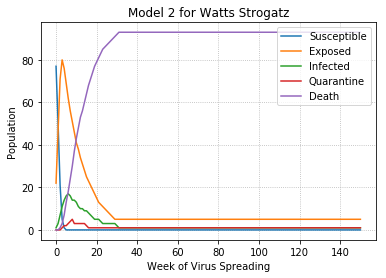

In [11]:
'''Watts Strogatz Graph - Visualizing EBOLA: Isolation-Control Stage'''
import matplotlib.pyplot as plt
s,e,i,q,d = RGV2[0,:], RGV2[1,:], RGV2[2,:], RGV2[3,:], RGV2[4,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 2 for Watts Strogatz')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig(image_dir+'seiqdimage/SEIQD EBOLA (Watts Strogatz Graph) - Data Parameter.png')
plt.show()

In [13]:
'''Barabasi Albert'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEIQD Ebola Model on the Network
def seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQD EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig(image_dir+'seiqdimage/BA/SEIQD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to quarantine
        quaranp=round(delta*len(infectnode))
        new_quaran=np.random.choice(infectnode,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)         
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in infection_list:
                        if node not in infection_list2:
                            infection_list2.append(node)
        # Putting nodes from quarantine into death_list at rate epsilon
        qdeathp=round(epsilon*len(quaranode))
        if len(quaranode)!=0:
            new_death2=np.random.choice(quaranode,qdeathp)
            for node in new_death2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in death_list2:
                                death_list2.append(node)
        # New deathnode is death_list with death_list2 with initial deaths
        deatlist=death_list+death_list2
        for node in deatlist:
            if node not in deathnode:
                deathnode.append(node)
        # New quarantine is nodes from the old quarantine which are not in death_list2
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in quaran_list:
                            quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in quaranode:
                    if node not in infectnode:
                        infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in infectnode:
                if node not in exposed_list:
                    if node not in deathnode:
                        if node not in quaranode:
                            exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in susceptible_list:
                                susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,doutput])

In [20]:
# Simulation for the Barabasi Albert
import imageio 
import os
'''G = nx.barabasi_albert_graph(100,20)
time, n, theta, gamma, delta, epsilon = 150,100,0.1,0.3,0.16,0.5
infection_start_node = 0
BAV=seiqdmodel(G, theta, gamma, delta, epsilon, time, infection_start_node)
BAV'''
png_dir =image_dir +'seiqdimage/BA/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(image_dir+"seiqdimage/SEIQD_on_BA_network.movie"+str(n)+".movie.gif", images,duration=0.8)


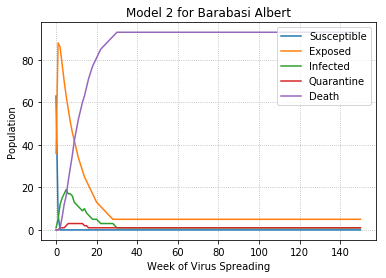

In [17]:
'''Barabasi Albert Graph - Visualizing EBOLA: Isolation-Control Stage'''
import matplotlib.pyplot as plt
s,e,i,q,d = BAV[0,:], BAV[1,:], BAV[2,:], BAV[3,:], BAV[4,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 2 for Barabasi Albert')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig(image_dir+'seidimage/SEIQD EBOLA (Barabasi Albert Graph) - Data Parameter.png')
plt.show()

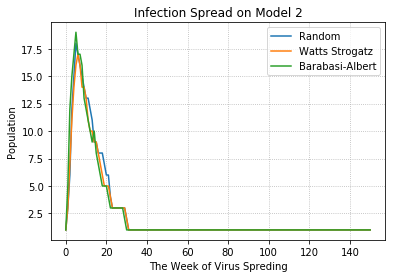

In [19]:
'''Visualizing EBOLA Infection in from the Three Graphs'''
import matplotlib.pyplot as plt
i1,i2,i3 = RGV[2,:], RGV2[2,:], BAV[2,:]
plt.plot(time, i1, label='Random')
plt.plot(time, i2, label='Watts Strogatz')
plt.plot(time, i3, label='Barabasi-Albert')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Infection Spread on Model 2')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig(image_dir+'seiqdimage/ALL INFECTION IN EBOLA MODEL 2 on Network - Data Parameter.png')
plt.show()